MAGPANTAY, NINO JANDEL C.

BSCS-3B

MR. BERNARDINO



# ***Part 1: Data Loading and Preprocessing***

# ***Load the Dataset:***

In [ ]:
import pandas as pd
# 1. Load the Dataset
df = pd.read_csv("onlinefoods.csv")
print(df.head())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

# ***Handle Missing Values:***

In [ ]:
# 2. Handle Missing Values
# Identify missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)

# ***Encode Categorical Variables:***

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Feedback']

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Concatenate encoded columns with original dataframe
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_cols], axis=1)

# Display the encoded dataframe
print(df_encoded.head())



# ***Feature Selection:***

In [ ]:
selected_features = ['Age', 'Educational Qualifications', 'Family size', 'Pin code', 'Output']
selected_df = df_encoded[selected_features]
print(selected_df.head())

# ***Descriptive Statistics:***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
print("Descriptive Statistics of Numeric Columns:")
print(df.describe())


# ***Visualizations***

In [ ]:
# 2. Visualizations

# Distribution of Age and its impact on Feedback
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', kde=True, bins=30)
plt.title('Distribution of Age and its impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.show()

# Proportions of Feedback across different levels of Monthly Income
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# ***Part 3: Logistic Regression Model***

In [ ]:
X = pd.get_dummies(df.drop(columns=['Feedback']), drop_first=True)
y = df['Feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)


# ***Part 4: Data Analysis and Visualization***

# ***Feature Importance:***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting feature coefficients from the trained model
feature_importance = model.coef_[0]

# Mapping feature names to their coefficients
feature_names = X.columns.tolist()
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sorting features based on their importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Extracting feature names and coefficients for visualization
sorted_feature_names = [feature[0] for feature in sorted_features]
sorted_feature_importance = [feature[1] for feature in sorted_features]

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top
plt.show()

# Discussing feature influence
print("Feature Importance:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")





# ***Prediction Insights:***

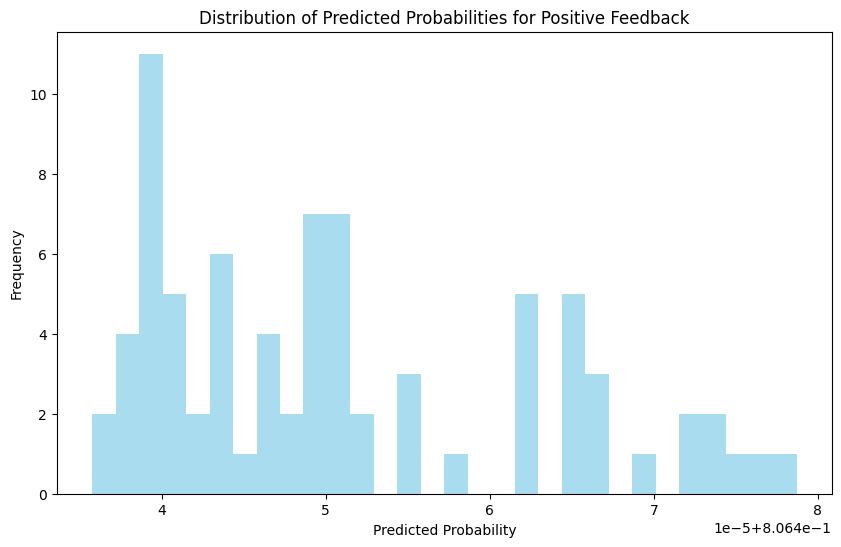

In [ ]:
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)

# Extract probabilities for positive feedback class
positive_probs = y_pred_prob[:, 1]

# Visualize the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(positive_probs, bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Predicted Probabilities for Positive Feedback')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

# Discussing insights from the visualization
